In [1]:
from fastai.vision.all import *
from fastai.distributed import *
import torch
import torch.nn as nn
import torchvision
from torchvision import models
import torchvision.transforms as transforms

In [2]:
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

trainset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=256, shuffle=True, num_workers=8)

testset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=256, shuffle=False, num_workers=8)

dls = DataLoaders(trainloader, testloader)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
model = models.vgg16_bn(pretrained=False)

In [4]:
model.classifier[-1] = nn.Linear(in_features=4096, out_features=10)
model = model.cuda()

In [5]:
learn = Learner(dls, model, loss_func=LabelSmoothingCrossEntropy(), metrics=accuracy, cbs=[CudaCallback, SaveModelCallback()], path=Path.cwd()/'tmp_cifar10')
learn.model = learn.model.cuda()

SuggestedLRs(lr_min=2.290867705596611e-05, lr_steep=0.0010000000474974513)

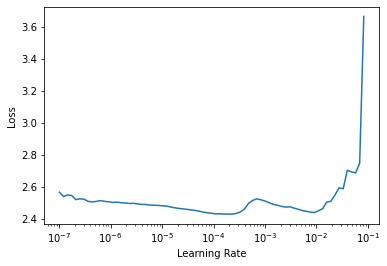

In [6]:
learn.lr_find()

In [7]:
learn.fit_one_cycle(50, 1.4e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.808553,1.626426,0.459200,00:18
1,1.578339,1.452696,0.564300,00:18
2,1.458309,1.363236,0.607500,00:18
3,1.346144,1.328478,0.645800,00:18
4,1.282133,1.416800,0.627500,00:18
5,1.206557,1.383873,0.637500,00:18
6,1.153822,1.221613,0.729100,00:18
7,1.113073,1.266336,0.684900,00:18
8,1.092442,1.125815,0.750900,00:18
9,1.052212,1.433026,0.648800,00:18


Better model found at epoch 0 with valid_loss value: 1.6264256238937378.
Better model found at epoch 1 with valid_loss value: 1.4526958465576172.
Better model found at epoch 2 with valid_loss value: 1.3632358312606812.
Better model found at epoch 3 with valid_loss value: 1.3284779787063599.
Better model found at epoch 6 with valid_loss value: 1.2216130495071411.
Better model found at epoch 8 with valid_loss value: 1.1258151531219482.
Better model found at epoch 10 with valid_loss value: 0.9883707761764526.
Better model found at epoch 12 with valid_loss value: 0.9443081021308899.
Better model found at epoch 13 with valid_loss value: 0.9073952436447144.
Better model found at epoch 16 with valid_loss value: 0.8777899146080017.
Better model found at epoch 17 with valid_loss value: 0.8709652423858643.
Better model found at epoch 19 with valid_loss value: 0.8319157361984253.
Better model found at epoch 21 with valid_loss value: 0.8130237460136414.
Better model found at epoch 23 with valid_lo

In [8]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.9214000105857849.


(#2) [0.7112414836883545,0.9214000105857849]

In [9]:
path = '../models/baseline/cifar10/'
    
# Create the directory  
# 'GeeksForGeeks' in  
# '/home / User / Documents'  
try:  
    os.mkdir(path)  
except OSError as error:  
    print(error) 

[Errno 17] File exists: '../models/baseline/cifar10/'


In [10]:
learn.save(Path().cwd()/'../models/baseline/cifar10/vgg16')

Path('/home/cody/inner-knowledge-pruning/notebooks/../models/baseline/cifar10/vgg16.pth')